<h1><span style="font-size:2em;">최강의 포켓몬 분석</span></h1>

이 데이터는 7세대 포켓몬 801마리에 대한 정보가 담긴 데이터입니다.
모든 정보는 serebii에서 스크랩되었습니다.

  [컬럼 설명]
- **abilities:** 포켓몬이 가질 수 있는 능력의 문자열 목록.
- **against_?:** 특정 윻ㅇ의 포켓몬 공격에 대해 받는 피해량.
- **attack:** 포켓몬의 기본 공격.
- **base_egg_steps:** 포켓몬의 알을 부활시키는 데 필요한 단계 수.
- **base_happiness:** 포켓몬 기본 행복도.
- **base_total:** HP, Attack, Defense, sp_attack, sp_defense 및 speed의 합계.
- **capture_rate:** 포켓몬 포획률.
- **classification:** 포켓몬 분류.
- **defense:** 포켓몬의 기본 방어.
- **experience_growth:** 포켓몬의 성장 경험치.
- **height_m:** 포켓몬의 높이(m).
- **hp:** 포켓몬의 기본 HP.
- **japanese_name:** 포켓몬의 일본 이름.
- **name:** 포켓몬의 영어 이름.
- **percentage_male:** 수컷인 종의 백분율, 포켓몬이 성별이 없는 경우 null.
- **pokedex_number:** 포켓몬 도감에 등록되는 포켓몬 항목 번호.
- **sp_attack:** 포켓몬의 기본 특수 공격.
- **sp_defense:** 포켓몬의 기본 특수 방어.
- **speed:** 포켓몬의 기본 속도.
- **type1:** 포켓몬의 기본 유형.
- **type2:** 포켓몬의 2번째 유형.
- **weight_kg:** 포켓몬의 무게(kg).
- **generation:** 포켓몬이 처음 도입된 번호가 매겨진 세대.
- **is_legendary:** 전설의 포켓몬 여부.
<br><br>
해당 데이터를 통해 어떠한 포켓몬이 가장 강력한 포켓몬인지, 세대에 따른 포켓몬의 특성을 분석할 것입니다.

# Imports

In [71]:
!pip install pywaffle
!pip install plot-utils
!pip install squarify

In [75]:
import warnings
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pywaffle import Waffle

warnings.filterwarnings('ignore')
# from pandas_plots_utils import pandas_plot
# from seaborn_plots_utils import (
#     seaborn_plot,
#     SEABORN_RC_PARAMS,
#     SEABORN_STYLE,
# )
import squarify

# sns.set(rc=SEABORN_RC_PARAMS, style=SEABORN_STYLE)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 기술통계

데이터 세트를 로드하여 기술통계를 통해 누락된 값 확인

In [22]:
pokemon_df = pd.read_csv('/content/drive/MyDrive/Game Analysis/Data/pokemon.csv')

print(f'Unique primary types: {pokemon_df["type1"].nunique()}')
print(f'Unique secondary types: {pokemon_df["type2"].nunique()}')

Unique primary types: 18
Unique secondary types: 18


In [23]:
pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [24]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [25]:
pokemon_df.isnull().sum()[pokemon_df.columns[pokemon_df.isnull().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

# 데이터 전처리

In [26]:
pokemon_df.drop(
    ['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'percentage_male'],
    axis=1,
    inplace=True,
)

pokemon_df.rename(str.title, axis='columns', inplace=True)

pokemon_df.replace(
    {
        'Is_Legendary': {
            0: "Non-legendary",
            1: "Legendary",
        },
    },
    inplace=True,
)

types = [t for t in list(pokemon_df['Type1'].unique())]
pokemon_df['Type1'].replace(types, [t.title() for t in types], inplace=True)
pokemon_df['Type2'].replace(types, [t.title() for t in types], inplace=True)

In [27]:
pokemon_df

,Abilities,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,...,Hp,Name,Sp_Attack,Sp_Defense,Speed,Type1,Type2,Weight_Kg,Generation,Is_Legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,65,65,45,Grass,Poison,6.9,1,Non-legendary
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,80,80,60,Grass,Poison,13.0,1,Non-legendary
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,122,120,80,Grass,Poison,100.0,1,Non-legendary
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,60,50,65,Fire,NaN,8.5,1,Non-legendary
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,80,65,80,Fire,NaN,19.0,1,Non-legendary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,97,Celesteela,107,101,61,Steel,Flying,999.9,7,Legendary
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,59,Kartana,59,31,109,Grass,Steel,0.1,7,Legendary
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,223,Guzzlord,97,53,43,Dark,Dragon,888.0,7,Legendary
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,97,Necrozma,127,89,79,Psychic,NaN,230.0,7,Legendary


### Type1과 Type2를 단일 유형으로 결합

In [28]:
pokemon_df['Type'] = pokemon_df.apply(
    lambda x: x['Type1'] if pd.isnull(x['Type2']) else f'{x["Type1"]}_{x["Type2"]}',
    axis=1,
)

능력 컬럼의 값 리스트형태로 변환

In [29]:
pokemon_df['Abilities'] = pokemon_df.apply(lambda x: literal_eval(x['Abilities']), axis=1)

포켓몬별 능력의 개수 컬럼 생성

In [30]:
pokemon_df['N_Abilities'] = pokemon_df.apply(lambda x: len(x['Abilities']), axis=1)

BMI열 생성

BMI = kg / m**2

In [31]:
pokemon_df['BMI'] = pokemon_df.apply(lambda x: x['Weight_Kg'] / (x['Height_M']**2), axis=1)

포획률의 30 (Meteorite)255 (Core) 값 Nan으로 변경

In [35]:
pokemon_df['Capture_Rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
pokemon_df['Capture_Rate'] = pd.to_numeric(pokemon_df['Capture_Rate'])

# EDA

**세대별 포켓몬 수**

Text(0.5, 1.0, 'Pokémon count of Generation')

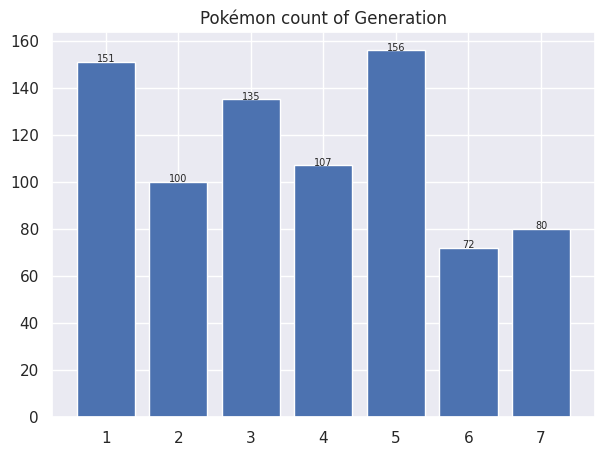

In [132]:
plt.figure(figsize = (7, 5))
bar1 = plt.bar(pokemon_df['Generation'].value_counts().index, pokemon_df['Generation'].value_counts().values)
for i in bar1:
  height = i.get_height()
  plt.text(i.get_x() + i.get_width()/2.0, height, '%.f' % height, ha='center', size = 7)
plt.title("Pokémon count of Generation")

홀수 세대는 짝수 세대에 비해 더 많은 포켓몬이 존재

**가장 흔한 유형은?**

<Axes: >

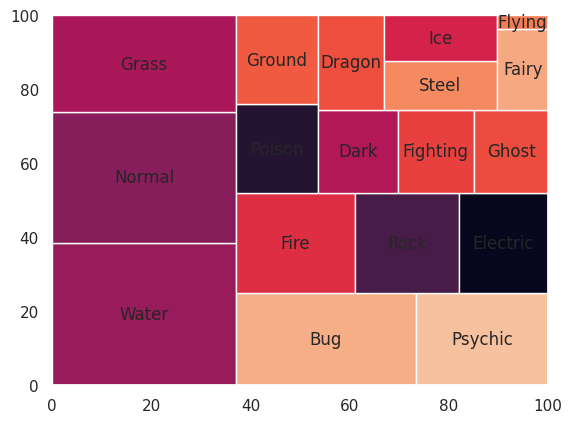

In [131]:
type1_value_counts = pokemon_df['Type1'].value_counts()

squarify.plot(
    type1_value_counts,
    label=type1_value_counts.index,
)

물 -> 노멀 -> 풀 ... 의 순으로 타입이 많다.

**보조 타입은?**

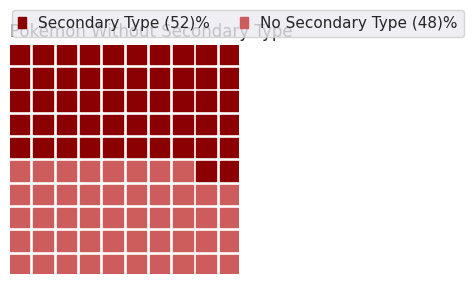

In [129]:
pokemon_without_secondary_type_percentage = round(pokemon_df["Type2"].isnull().sum() / len(pokemon_df) * 100)

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(6, 3),
    rows=10,
    columns=10,
    values=[100 - pokemon_without_secondary_type_percentage, pokemon_without_secondary_type_percentage],
    colors=['darkred', 'indianred'],
    title={
        'label': 'Pokémon Without Secondary Type',
        'loc': 'left',
    },
    labels=[
        f'Secondary Type ({100- pokemon_without_secondary_type_percentage})%',
        f'No Secondary Type ({pokemon_without_secondary_type_percentage})%',
    ],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (-0.025, 1),
        'ncol': 2,
        'handlelength': 0.5,
    },
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake',
)

포켓몬의 거의 절반이 보조 유형이 없다.

In [82]:
types_df

,Type1,Type2
Flying,3,95
Poison,32,34
Ground,32,34
Psychic,53,29
Fairy,18,29
Fighting,28,25
Steel,24,22
Dark,29,21
Grass,78,20
Dragon,27,17


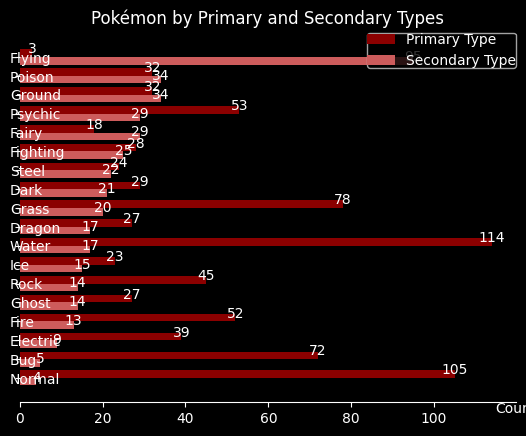

In [95]:
type2_value_counts = pokemon_df['Type2'].value_counts()
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1)
types_df.sort_values(by='Type2', ascending=False, inplace=True)

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

bar_width = 0.4
index = np.arange(len(types_df))

plt.barh(
    index - bar_width/2,
    types_df['Type1'],  # type1 컬럼 사용
    color='darkred',
    height=bar_width,
    label='Primary Type',
)

plt.barh(
    index + bar_width/2,
    types_df['Type2'],  # type2 컬럼 사용
    color='indianred',
    height=bar_width,
    label='Secondary Type',
)

plt.title('Pokémon by Primary and Secondary Types')
plt.xlabel('Count')
plt.gca().xaxis.set_label_coords(1, 0)
plt.yticks(ticks=index, labels=types_df.index, ha='left')
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(loc='upper right', borderaxespad=0, borderpad=0)
for i, (v1, v2) in enumerate(zip(types_df['Type1'], types_df['Type2'])):
    plt.text(v1, i - bar_width/2, f'{v1:.0f}', color='white', ha='center')
    plt.text(v2, i + bar_width/2, f'{v2:.0f}', color='white', ha='center')

plt.show()



타입별 유형1과 유형2 비교한 결과이다.

**가장 일반적인 유형 조합은 무엇인가?**

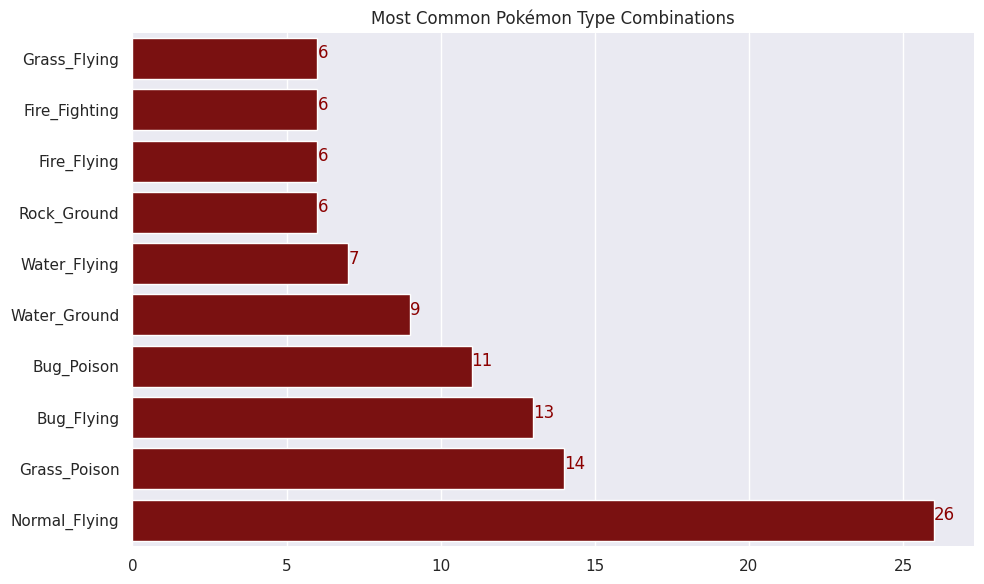

In [109]:
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=pokemon_df[~pokemon_df['Type2'].isnull()],
    y='Type',
    order=pokemon_df[~pokemon_df['Type2'].isnull()]["Type"].value_counts()[:10].index,
    palette=['darkred'],
    orient='h',
)

plt.title('Most Common Pokémon Type Combinations')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(range(len(pokemon_df[~pokemon_df['Type2'].isnull()]["Type"].value_counts()[:10].index)),
#            pokemon_df[~pokemon_df['Type2'].isnull()]["Type"].value_counts()[:10].index,
#            ha='left')
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.0f}', color='darkred')

plt.tight_layout()
plt.show()


첫 번째: 일반 + 비행<Br>
두 번째: 풀 + 독<Br>
세 번째: 벌레 + 비행<Br>

**전설의 포켓몬의 가장 일반적인 유형**

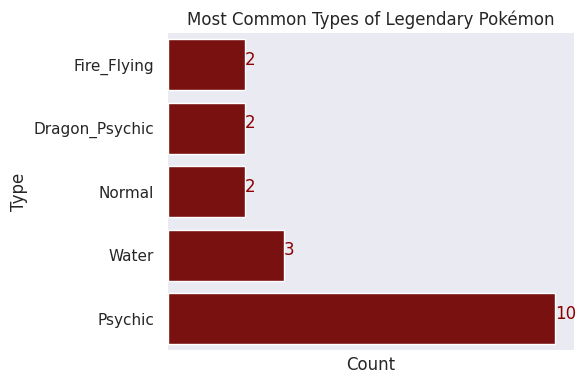

In [110]:
import seaborn as sns

# sns.set(style='darkgrid')

legendary_pokemon = pokemon_df[pokemon_df['Is_Legendary'] == 'Legendary']

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=legendary_pokemon,
    y='Type',
    order=legendary_pokemon["Type"].value_counts()[:5].index,
    palette=['darkred'],
    orient='h',
)

plt.title('Most Common Types of Legendary Pokémon')
plt.xlabel('Count')
plt.ylabel('Type')
plt.xticks([])
# plt.yticks(range(len(legendary_pokemon["Type"].value_counts()[:5].index)),
#            legendary_pokemon["Type"].value_counts()[:5].index,
#            ha='left')
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.0f}', color='darkred')

plt.tight_layout()
plt.show()


전설의 포켓몬의 가장 일반적인 유형은 Psychic

**세대에 따른 기본유형의 차이**

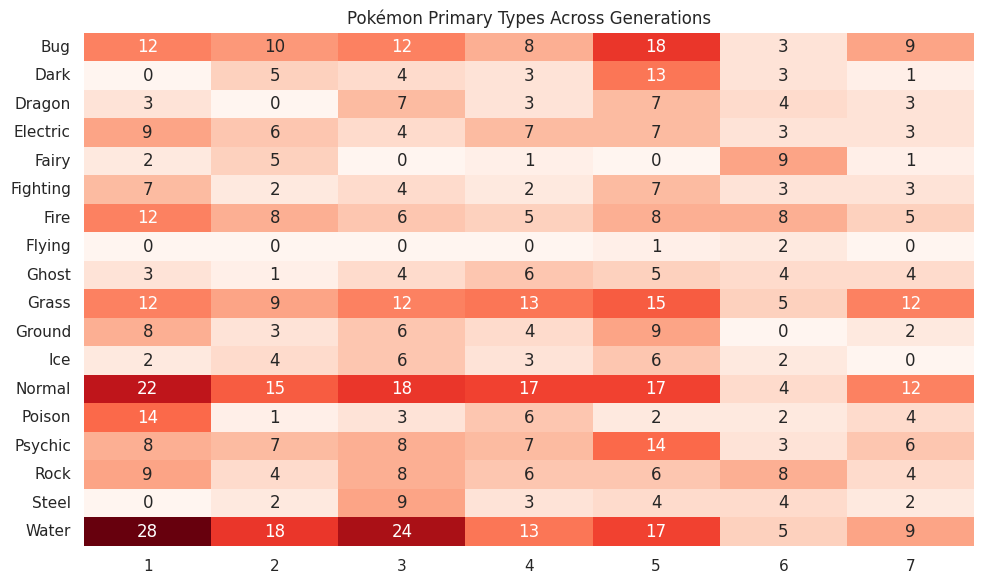

In [112]:
import seaborn as sns

sns.set(style='darkgrid')

type1_by_generation = pd.crosstab(pokemon_df['Type1'], [pokemon_df['Generation']])

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    type1_by_generation,
    annot=True,
    cbar=False,
    cmap='Reds',
)

plt.title('Pokémon Primary Types Across Generations')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(ha='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


1세대: 암흑, 강철, 비행 그리고 2세대에는 용, 비행같은 타입이 존재하지 않음<br><br>
비행은 5,6 세대에서만 기본 유형으로 존재한다.<br><br>
1세대에는 독, 3세대에는 강철, 5세대에는 어둠과 사이킥, 6세대에는 페어리 타입이 유난히 많다.<br><br>


**가장 잡기 쉬운 포켓몬 세대**

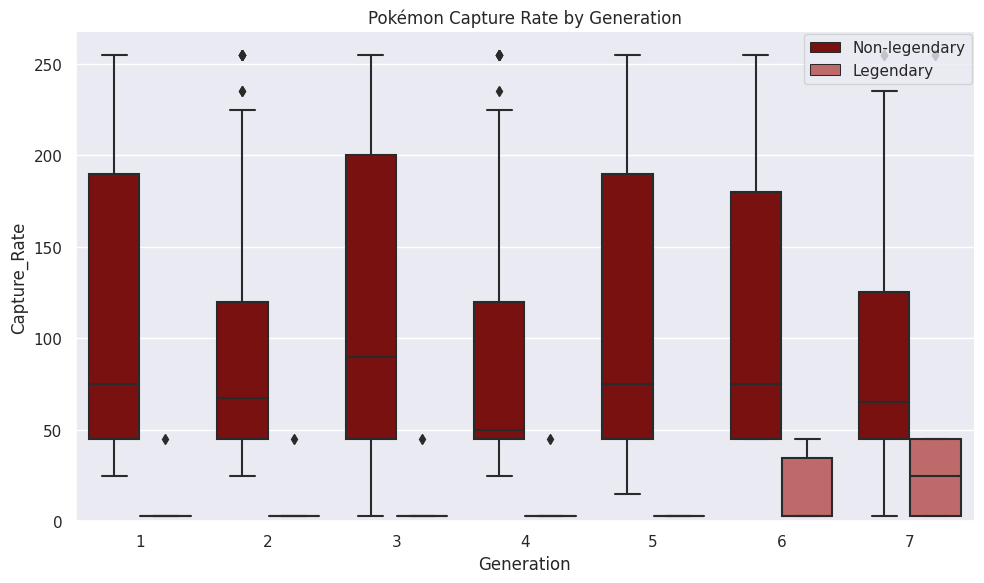

In [113]:
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=pokemon_df,
    x='Generation',
    y='Capture_Rate',
    hue='Is_Legendary',
    palette=['darkred', 'indianred'],
)

plt.title('Pokémon Capture Rate by Generation')
plt.ylim(bottom=0)
sns.despine(top=True, right=True)
ax.legend(loc='upper right', borderaxespad=0.15)

plt.tight_layout()
plt.show()


3세대가 가장 포획하기 쉬운 포켓몬이며, 4세대가 가장 어렵다.<br><br>
전설의 포켓몬은 6세대부터 잡기가 더 쉽다.

**가장 잡기 쉬운 포켓몬**

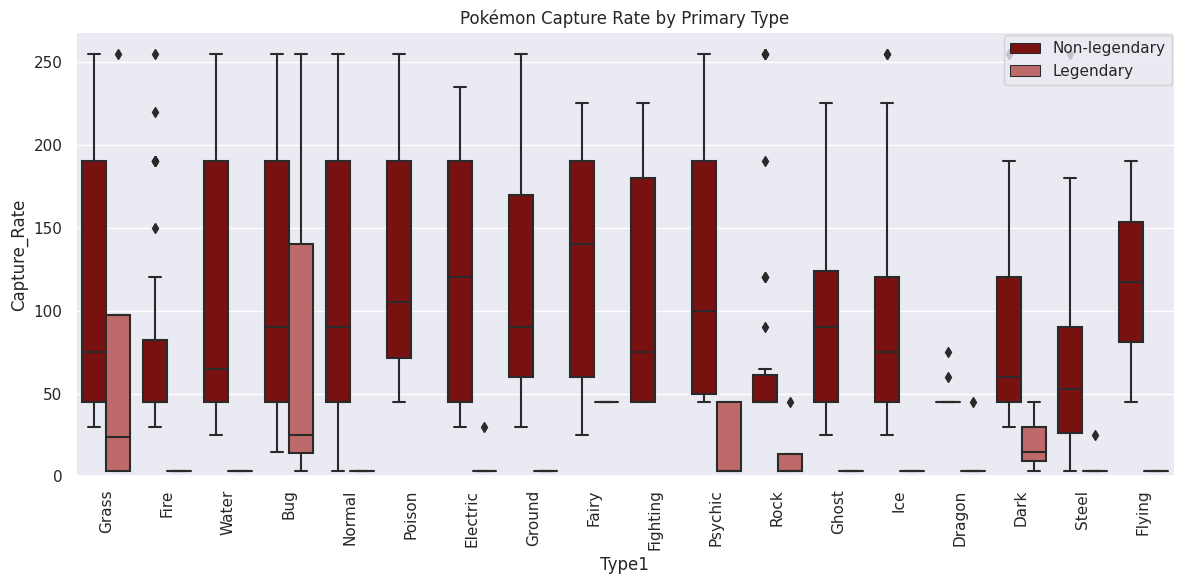

In [114]:
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=pokemon_df,
    x='Type1',
    y='Capture_Rate',
    hue='Is_Legendary',
    palette=['darkred', 'indianred'],
)

plt.title('Pokémon Capture Rate by Primary Type')
plt.xticks(rotation=90)
plt.ylim(bottom=0)
sns.despine(top=True, right=True)
ax.legend(loc='upper right', borderaxespad=0.15)

plt.tight_layout()
plt.show()


페어리 타입이 가장 잡기 쉬운 포켓몬이며 드래곤이 가장 어렵다.

잡기 가장 쉬운 전설의 포켓몬은 풀과 벌레 타입이다.

**포켓몬은 보통 몇 가지 능력을 가지고 있는지?**

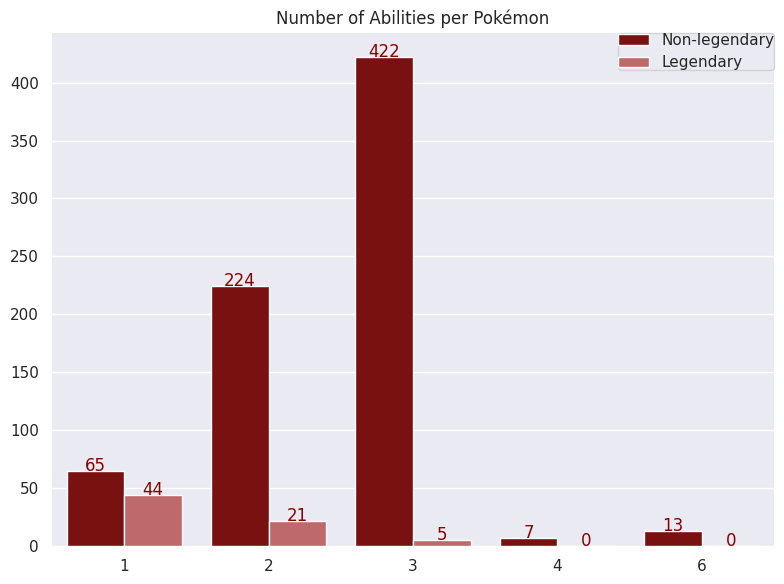

In [126]:
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=pokemon_df,
    orient='v',
    x='N_Abilities',
    hue='Is_Legendary',
    order=[1, 2, 3, 4, 6],
    palette=['darkred', 'indianred'],
)

plt.title('Number of Abilities per Pokémon')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(ha='left')
plt.tick_params(axis='x')
sns.despine(top=True, right=True, left=True, bottom=True)
ax.legend(loc='upper right', borderaxespad=0, borderpad=0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.0f}', ha='center', color='darkred')

plt.tight_layout()
plt.show()


비전설의 포켓몬의 가장 일반적인 능력 개수는 3개이며, 대부분의 전설의 포켓몬은 1개의 능력만 가지고 있다.

**피지컬이 좋은 포켓몬은?**

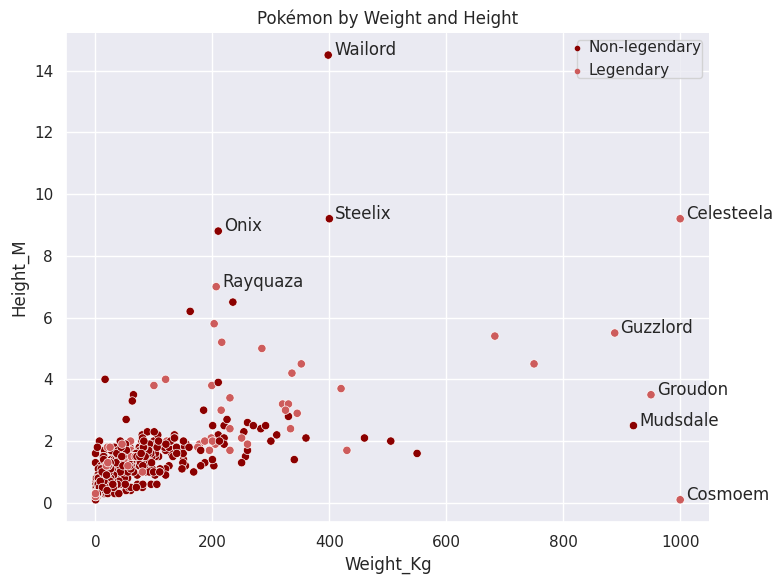

In [118]:
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=pokemon_df,
    x='Weight_Kg',
    y='Height_M',
    hue='Is_Legendary',
    palette=['darkred', 'indianred'],
)

plt.title('Pokémon by Weight and Height')
sns.despine(top=True, right=True)

legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=legend_handles, loc='upper right', borderpad=0, markerscale=0.5, handlelength=0)

# Label top 5 by weight and height
top5_weight_height_merged = pd.concat([
    pokemon_df.nlargest(5, 'Height_M'),
    pokemon_df.nlargest(5, 'Weight_Kg'),
]).drop_duplicates(subset=['Name'])
for index, row in top5_weight_height_merged.iterrows():
    plt.annotate(row['Name'], xy=(row['Weight_Kg'] + 10, row['Height_M']))

plt.tight_layout()
plt.show()


가장 키가 큰 포켓몬 5개 중 2개는 전설의 포켓몬이며, 무거운 포켓몬 5개 중 4개는 전설의 포켓몬이다.

셀레스틸라는 몸무게와 키 모두 top5안에 드는 유일한 포켓몬이다.

**BMI가 가장 높은 포켓몬?**

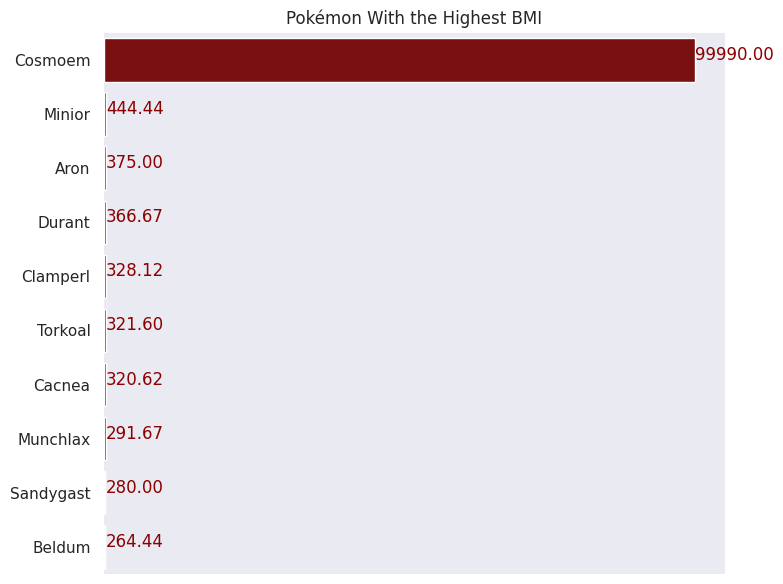

In [121]:
import seaborn as sns
top10_highest_bmi = pokemon_df.loc[:, ['Name', 'BMI']].sort_values(by='BMI', ascending=False)[:10].reset_index()

sns.set(style='darkgrid')

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=top10_highest_bmi,
    orient='h',
    x='BMI',
    y='Name',
    color='darkred',
)

plt.title('Pokémon With the Highest BMI')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
# plt.yticks(ha='left')
sns.despine(top=True, right=True, left=True, bottom=True)
for i, v in enumerate(top10_highest_bmi['BMI']):
    ax.text(v + 0.5, i, f'{v:.2f}', ha='left', color='darkred')

plt.tight_layout()
plt.show()


Cosmoem이 가장 높다.

BMI가 가장 낮은 포켓몬은?

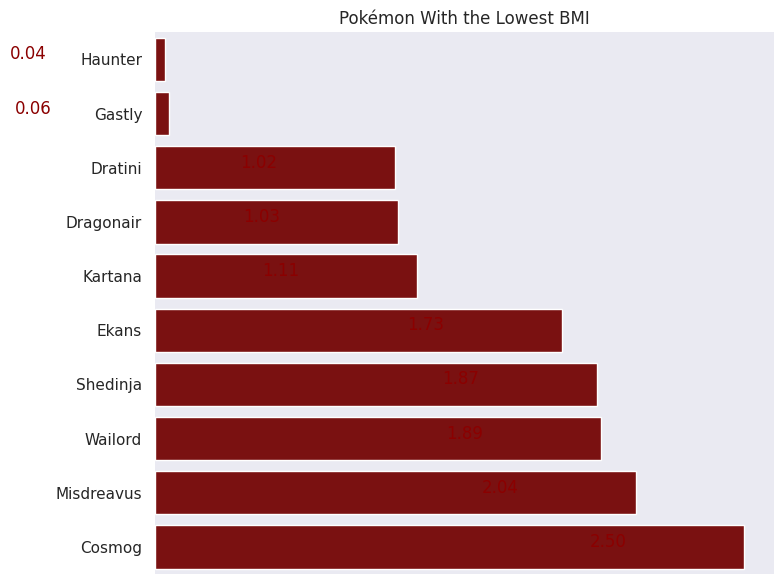

In [124]:
top10_lowest_bmi = pokemon_df.loc[:, ['Name', 'BMI']].sort_values(by='BMI', ascending=True)[:10].reset_index()

import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=top10_lowest_bmi,
    orient='h',
    x='BMI',
    y='Name',
    color='darkred',
)

plt.title('Pokémon With the Lowest BMI')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
# plt.yticks(ha='left')
sns.despine(top=True, right=True, left=True, bottom=True)
for i, v in enumerate(top10_lowest_bmi['BMI']):
    ax.text(v - 0.5, i, f'{v:.2f}', ha='right', color='darkred')

plt.tight_layout()
plt.show()


Haunter와 진화 이전 Gastly가 가장 낮으며, Dratini와 진화버전 Gragonair가 그 뒤를 잇는다.

**최고 세대는?**

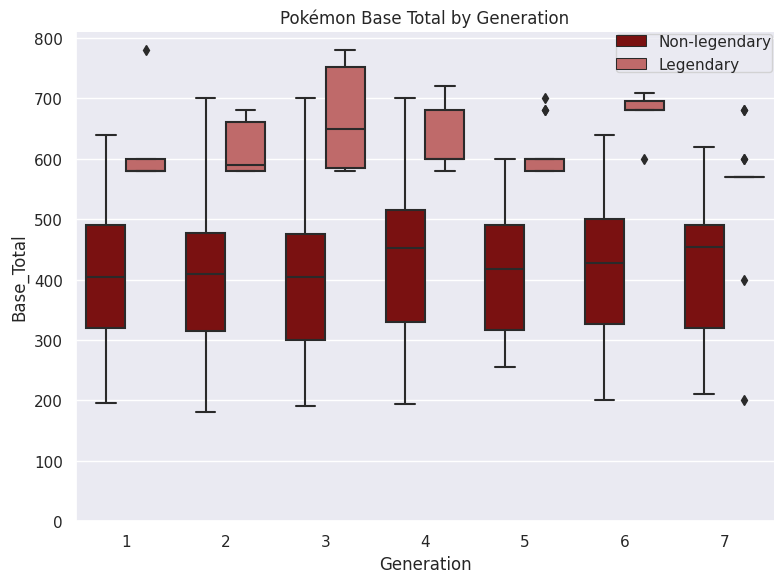

In [133]:
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=pokemon_df,
    x='Generation',
    y='Base_Total',
    hue='Is_Legendary',
    palette=['darkred', 'indianred'],
)

plt.title('Pokémon Base Total by Generation')
plt.ylim(bottom=0)
sns.despine(top=True, right=True)
plt.legend(borderaxespad=0.15, borderpad=0)

plt.tight_layout()
plt.show()


일반 포켓몬 중에서는 4세대에 최고의 능력치를 가진 포켓몬이 있고, 전설의 포켓몬 중에서는 3세대에 최고의 능력치를 가진 포켓몬이 있다.

**속성별 상관관계**

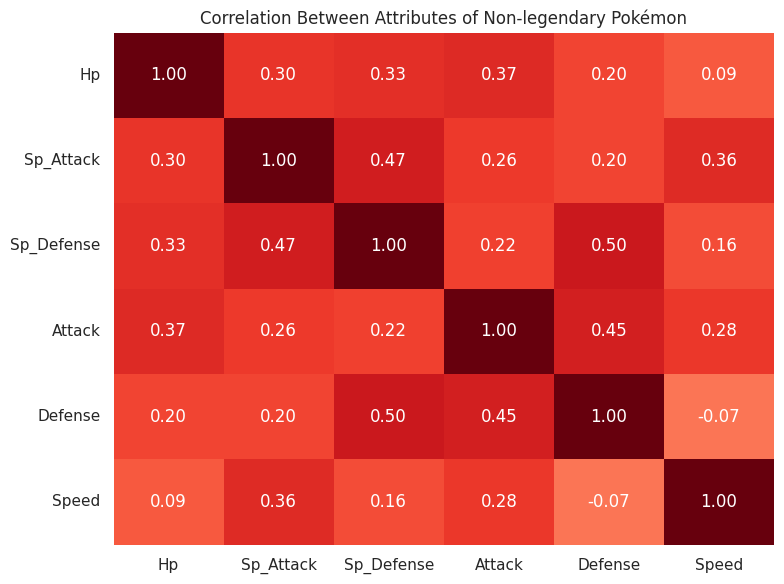

In [135]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    data=pokemon_df[pokemon_df['Is_Legendary'] == 'Non-legendary'].loc[:, ['Hp', 'Sp_Attack', 'Sp_Defense', 'Attack', 'Defense', 'Speed']].corr(),
    annot=True,
    cbar=False,
    cmap='Reds',
    fmt='.2f',
    vmin=-1,
    vmax=1,
)

plt.title('Correlation Between Attributes of Non-legendary Pokémon')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(ha='left')
plt.tight_layout()
plt.show()


* 일반 포켓몬에 대해:
    
    - hp와 sp_attack, sp_defense와 attack 사이에는 양의 관계가 있다. 하지만 방어와는 낮은 상관관계를 보여주고있다. 방어가 높은 포켓몬이 더 높은 hp를 가질것이라 생각하였지만 그게 아니었다!! wow factor아닌가?..
    - attack은 defense와 가장 밀접한 관계가 있다.
    - Defense는 sp_defense와 가장 강한 관계가 있다.
    - Speed는 defense와 매우 약한 음의 관계가 있다.

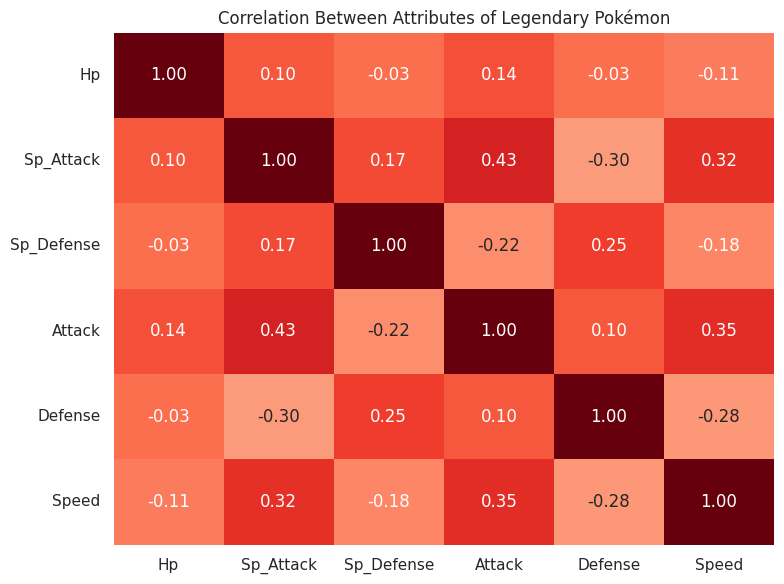

In [137]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    data=pokemon_df[pokemon_df['Is_Legendary'] == 'Legendary'].loc[:, ['Hp', 'Sp_Attack', 'Sp_Defense', 'Attack', 'Defense', 'Speed']].corr(),
    annot=True,
    cbar=False,
    cmap='Reds',
    fmt='.2f',
    vmin=-1,
    vmax=1,
)

plt.title('Correlation Between Attributes of Legendary Pokémon')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(ha='left')
plt.tight_layout()
plt.show()


* 전설의 포켓몬에 대해:

    - 전설의 포켓몬은 attack과 sp_defense, 방어와 sp_attack의 관계가 음의 관계로 바뀐다. 또한 attack과 speed가 양의 관계로, defense와 speed의 관계가 음의 관계로 더 강해졌다.

    - 즉, 공격수 타입의 전설의 포켓몬은 공격력과 스피드가 더 빨라졌고 수비수 타입의 전설의 포켓몬은 방어를 높이고 스피드를 낮추며 밸런스를 조절했구나..
    
    - 그렇다면, 공격적인 전설의 포켓몬은 밸런스가 매우 붕괴된게 아닌가..? 공격과 스피드를 둘다 줬으니!!


**가장 좋은 유형은?**

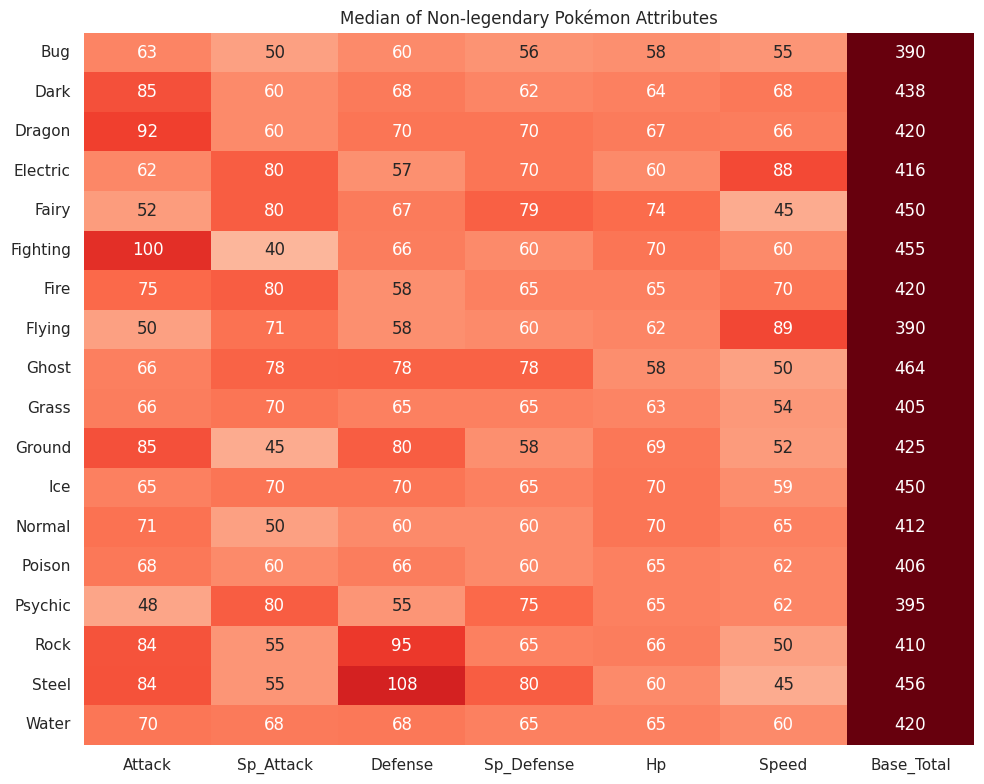

In [138]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    data=pokemon_df[pokemon_df['Is_Legendary'] == 'Non-legendary'].groupby(['Type1']).median()[['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']],
    annot=True,
    cbar=False,
    cmap='Reds',
    fmt='.0f',
    vmin=0,
    vmax=150,
)

plt.title('Median of Non-legendary Pokémon Attributes')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(ha='left')
plt.tight_layout()
plt.show()


* 일반 포켓몬:
    - Top 5 types - attack: fighting, dragon, ground, dark, steel
    - Top 5 types - sp_attack: psychic, electric, fairy, fire, ghost
    - Top 5 types - defense: steel, rock, ground, ghost, ice
    - Top 5 types - sp_defense: steel, fairy, ghost, psychic, dragon
    - Top 5 types - hp: fairy, normal, fighting, ice, ground
    - Top 5 types - speed: flying, electric, fire, dark, dragon
    - Top 5 types - base_total: ghost, steel, fighting, fairy and ice

불, 어둠, 용 타입의 포켓몬은 attack, sp_attack, speed가 top5에 들기 때문에 공격위주의 포켓몬이다.

요정, 얼음, 땅 타입의 포켓몬은 defense, sp_defense, hp가 top5에 들기 때문에 방어위주의 포켓몬이다.

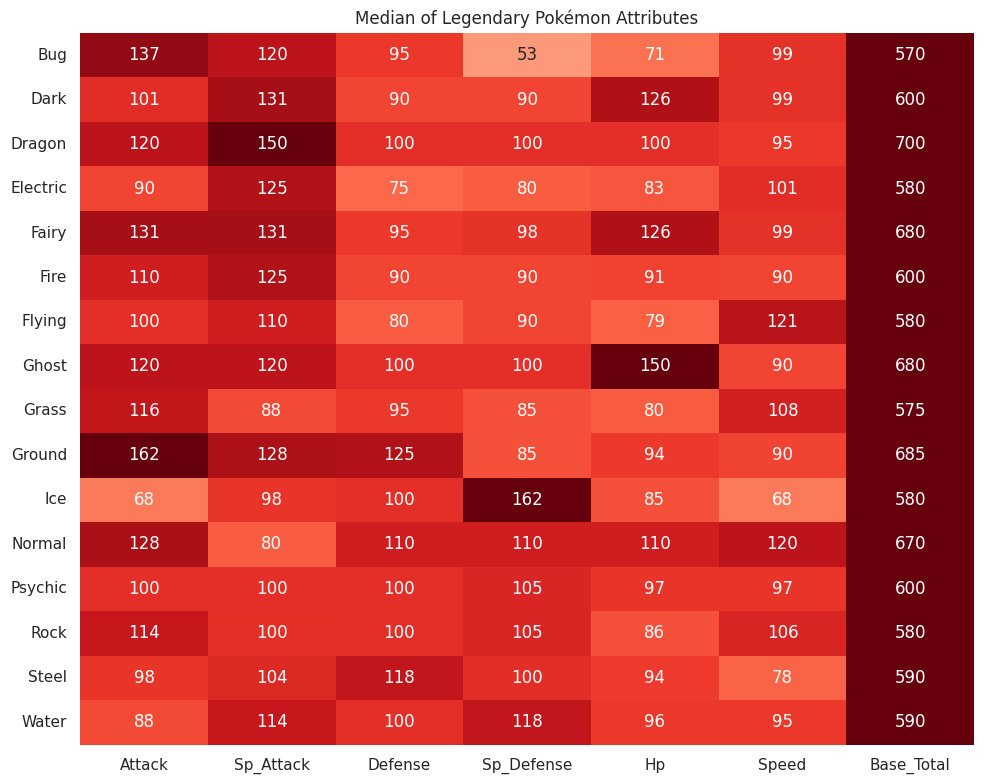

In [139]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    data=pokemon_df[pokemon_df['Is_Legendary'] == 'Legendary'].groupby(['Type1']).median()[['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']],
    annot=True,
    cbar=False,
    cmap='Reds',
    fmt='.0f',
    vmin=0,
    vmax=150,
)

plt.title('Median of Legendary Pokémon Attributes')
plt.xlabel('')
plt.ylabel('')
# plt.yticks(ha='left')
plt.tight_layout()
plt.show()


* 전설의 포켓몬:
    - Top 5 types - attack: ground, bug, fairy, normal, dragon
    - Top 5 types - sp_attack: dragon, dark, fairy, ground, electric
    - Top 5 types - defense: ground, steel, normal, dragon, ghost
    - Top 5 types - sp_defense: ice, water, normal, psychic, rock
    - Top 5 types - hp: ghost, dark, fairy, normal, dragon
    - Top 5 types - speed: flying, normal, grass, rock, electric
    - Top 5 types - base_total: dragon, ground, fairy, ghost, normal

일반, 전기 타입의 포켓몬이 공격하기 좋은 포켓몬.

고스트, 노멀, 드래곤이 방어하기 좋은 포켓몬.


**유형 효율성 분석**

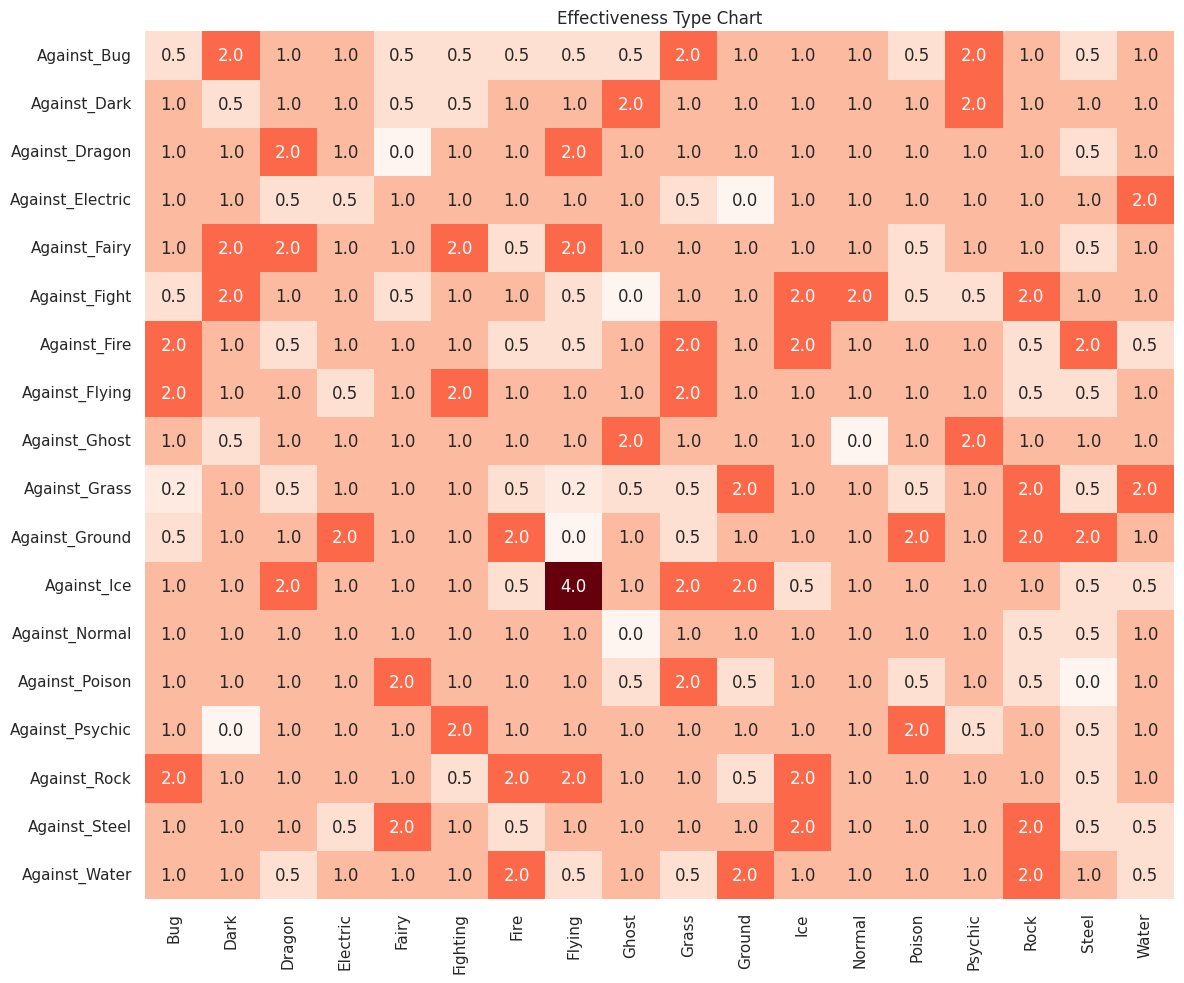

In [141]:
against_columns = [
    'Against_Bug',
    'Against_Dark',
    'Against_Dragon',
    'Against_Electric',
    'Against_Fairy',
    'Against_Fight',
    'Against_Fire',
    'Against_Flying',
    'Against_Ghost',
    'Against_Grass',
    'Against_Ground',
    'Against_Ice',
    'Against_Normal',
    'Against_Poison',
    'Against_Psychic',
    'Against_Rock',
    'Against_Steel',
    'Against_Water',
]

pokemon_type_effectiveness = pokemon_df.groupby(['Type1']).median()[against_columns].T

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    data=pokemon_type_effectiveness,
    annot=True,
    cbar=False,
    cmap='Reds',
    fmt='.1f',
    vmin=0,
    vmax=4,
)

plt.title('Effectiveness Type Chart')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('')
# plt.yticks(ha='left')
plt.tight_layout()
plt.show()


전기는 땅 타입에 약하고, 노말은 격투 타입에 약하다는 것을 강조하기 한다.
신기하게도 유령은 유령끼리 약하고 비행은 얼음에 극도로 약하다는 인사이트를 도출했다.

* 쓸모없는 유형:
    - psychic against dark
    - dragon against fairy
    - ground against flying
    - fighting against ghost
    - normal against ghost
    - ghost against normal
    - electric against ground
    - poison against steel
    
자세한 결과는 [여기](https://pokemondb.net/type)를 클릭하세요.

**최고의 포켓몬은?**

기본 능력치에 따라 top10 포켓몬 추출.

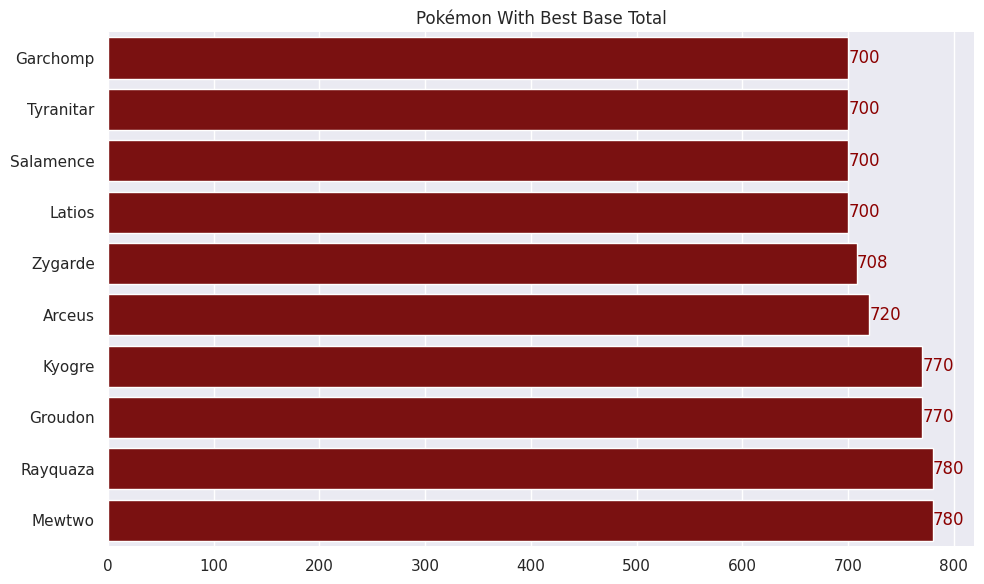

In [143]:
top10_pokemon_base_total = pokemon_df.loc[:, ['Name', 'Base_Total']].sort_values(
    by='Base_Total',
    ascending=False,
)[:10].reset_index()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_pokemon_base_total,
    orient='h',
    x='Base_Total',
    y='Name',
    color='darkred',
)

plt.title('Pokémon With Best Base Total')
plt.xlabel('')
# plt.xticks(labels=[])
plt.ylabel('')
# plt.yticks(ha='left')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.gca().invert_yaxis()

data_labels = top10_pokemon_base_total['Base_Total']
for i, value in enumerate(data_labels):
    plt.text(value, i, f'{value:.0f}', color='darkred', va='center')

plt.tight_layout()
plt.show()


뮤츠와 레쿠자가 가장 좋은 포켓몬으로 선정됨!

실제로 본인은 레쿠자를 가장 좋아하며, 핵으로 항상 레쿠자를 잡고 시작했던 기억이 있다.

# 분석 결과 요약
 * 물타입의 포켓몬이 가장 많고, 그 다음이 노멀과 풀이다.
 * 3세대가 가장 잡기 쉬운 포켓몬이며, 4세대는 가장 어렵다.
 * 전설의 포켓몬은 6세대로 진입하면서 부터 포획하기가 조금 더 수월해졌다.
 * 페어리 타입은 가장 잡기 쉬운 포켓몬이고, 드래곤이 가장 어렵다(전설의 포켓몬이 드래곤이 많아서 그런가..?).
 * 잡기 쉬운 전설의 포켓몬은 풀가 벌레 타입이다..
 * 4세대에는 최고의 일반 포켓몬이 있고, 3세대에는 최고의 전설에 포켓몬이 있다.
 * 1~7세대 통틀어 뮤츠와 레쿠자가 최고의 포켓몬이다.


# References
1. Coetzee, J. (2018). DataVis Battle Entry: Getting to know my Pokémon. Available at: https://towardsdatascience.com/reddit-datavis-entry-getting-to-know-my-pok%C3%A9mon-e0bcf4b4b803
2. Verma, A. (2018). GgPlot ‘Em All | Pokemon. Available at: https://towardsdatascience.com/exploratory-analysis-of-pokemons-using-r-8600229346fb
3. The Python Graph Gallery. (2018). Radar Chart. Available at: https://www.python-graph-gallery.com/radar-chart
